In [19]:
import os

import numpy as np
import pickle
import scipy.stats
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  



from AllenSDK.allensdk.brain_observatory.dff import calculate_dff
import session
reload(session)

ImportError: No module named AllenSDK.allensdk.brain_observatory.dff

In [20]:
import os 
print(os.path.join('AllenSDK','allensdk','brain_observatory', 'dff'))
import sys

print sys.path

AllenSDK/allensdk/brain_observatory/dff
['', '/home/colleen/anaconda2/lib/python27.zip', '/home/colleen/anaconda2/lib/python2.7', '/home/colleen/anaconda2/lib/python2.7/plat-linux2', '/home/colleen/anaconda2/lib/python2.7/lib-tk', '/home/colleen/anaconda2/lib/python2.7/lib-old', '/home/colleen/anaconda2/lib/python2.7/lib-dynload', '/home/colleen/anaconda2/lib/python2.7/site-packages', '/home/colleen/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/home/colleen/.ipython']


In [40]:
# set the main data directory (this needs to be changed by each user)
maindir = '/media/colleen/LaCie/CredAssign/pilot_data'

omit_sess = [721038464] # alignment didn't work

sess = 715244457
# check out 712483302 - 534 dropped frames out of 243000

In [34]:
# create a dictionary with Session objects prepared for analysis
sdict = {}
mouse_df = pd.read_pickle('mouse_df.pkl')
allsessions = mouse_df.loc[(mouse_df['all_files'] == 1) & 
                           (mouse_df['sessionid'].isin(omit_sess) == False)]['sessionid'].tolist()

for sess in allsessions:
    print("\nCreating session {}...".format(sess))
    sdict[sess] = session.Session(maindir,sess)    # creates a session object to work with
    sdict[sess].extract_info()                     # extracts necessary info for analysis
    print("finished session {}.".format(sess))


Creating session 712483302...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_712483302
Loading running data...
Loading ROI trace info...


finished session 712483302.

Creating session 712942208...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_712942208
Loading running data...
Loading ROI trace info...


finished session 712942208.

Creating session 715244457...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_715244457
Loading running data...
Loading ROI trace info...


finished session 715244457.

Creating session 716425232...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle alrea

Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_723323411
Loading running data...
Loading ROI trace info...



finished session 723323411.

Creating session 724421207...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_724421207
Loading running data...
Loading ROI trace info...



finished session 724421207.

Creating session 724422062...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_724422062
Loading running data...
Loading ROI trace info...



finished session 724422062.

Creating session 725009252...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/oph

In [36]:
# pick some padding
pad = (10,0)

In [42]:
# load the traces
[ssegs, nsegs] = sdict[sess].gabors.get_all_surp_segs(by='seg')
sframes = sdict[sess].gabors.get_2pframes_by_seg(ssegs)
nframes = sdict[sess].gabors.get_2pframes_by_seg(nsegs)
straces = sdict[sess].get_roi_segments(sframes,padding=pad)
ntraces = sdict[sess].get_roi_segments(nframes,padding=pad)

In [43]:
# get the mean across segments
straces_ms = np.nanmean(straces,axis=2)
ntraces_ms = np.nanmean(ntraces,axis=2)

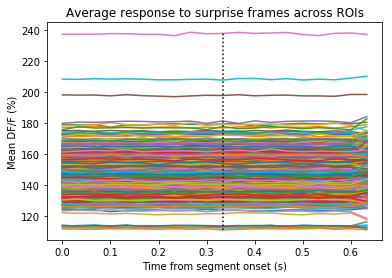

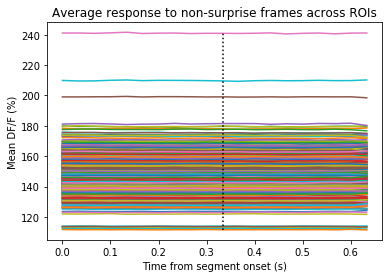

In [44]:
# determine the number of time-steps we're plotting
sn = straces.shape[1]
nn = ntraces.shape[1]

# create a time array for plotting
fps = 30.0
st  = np.arange(0,sn*(1.0/fps),1.0/fps)
nt  = np.arange(0,nn*(1.0/fps),1.0/fps)

# stim onset time
stim_t = st[pad[0]]

# plot the ROI responses for surprise segments (averaged across segments)
f1, ax1 =  plt.subplots()
ax1.plot(st,straces_ms.transpose())
ax1.plot([stim_t,stim_t],[straces_ms.min(),straces_ms.max()],'k:')
plt.xlabel('Time from segment onset (s)')
plt.ylabel('Mean DF/F (%)')
plt.title('Average response to surprise frames across ROIs')
plt.show()

# plot the ROI for surprise for non-surprise segments (averaged across segments)
f2, ax2 =  plt.subplots()
ax2.plot(nt,ntraces_ms.transpose())
ax2.plot([stim_t,stim_t],[ntraces_ms.min(),ntraces_ms.max()],'k:')
plt.xlabel('Time from segment onset (s)')
plt.ylabel('Mean DF/F (%)')
plt.title('Average response to non-surprise frames across ROIs')
plt.show()